In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

print("Welcome to the Handwritten Digits Recognition")

# Decide if to load an existing model or to train a new one
train_new_model = True

if train_new_model:
    # Loading the MNIST data set with samples and splitting it
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalizing the data (making length = 1)
    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

    # Create a neural network model
    # Add one flattened input layer for the pixels
    # Add two dense hidden layers
    # Add one dense output layer for the 10 digits
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=512, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

    # Compiling and optimizing model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model and saving the history
    history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

    # Evaluating the model
    val_loss, val_acc = model.evaluate(X_test, y_test)
    print("val loss: ",val_loss)
    print("val accuracy",val_acc)

    # Saving the model
    model.save('handwritten_digits.h5')
else:
    # Load the model
    model = tf.keras.models.load_model('handwritten_digits.h5')

Welcome to the Handwritten Digits Recognition
Epoch 1/500
1875/1875 [==============================] - 37s 15ms/step - loss: 0.2497 - accuracy: 0.9233 - val_loss: 0.1297 - val_accuracy: 0.9600
Epoch 2/500
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1189 - accuracy: 0.9650 - val_loss: 0.1231 - val_accuracy: 0.9624
Epoch 3/500
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0848 - accuracy: 0.9748 - val_loss: 0.1065 - val_accuracy: 0.9698
Epoch 4/500
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0679 - accuracy: 0.9804 - val_loss: 0.1021 - val_accuracy: 0.9707
Epoch 5/500
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0565 - accuracy: 0.9831 - val_loss: 0.1072 - val_accuracy: 0.9698
Epoch 6/500
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0477 - accuracy: 0.9863 - val_loss: 0.1048 - val_accuracy: 0.9751
Epoch 7/500
1875/1875 [==============================] - 21s 11ms/step -

c:\Program Files\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


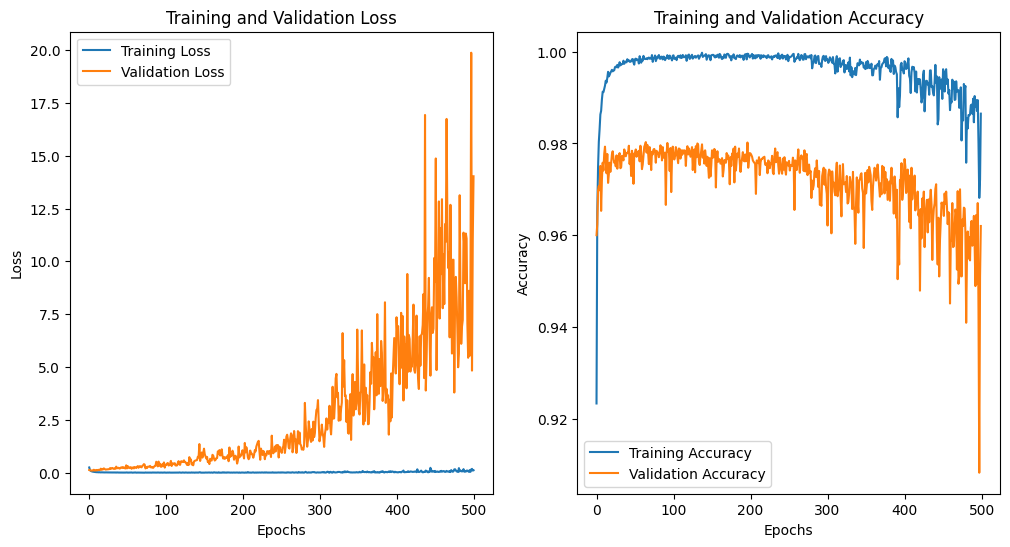

In [2]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [3]:
# Load custom images and predict them
image_number = 1
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:, :, 0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1


In [5]:

# Load the pre-trained model
model = tf.keras.models.load_model('handwritten_digits.h5')

# Create a simple GUI application using Tkinter
class DigitRecognizerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Handwritten Digit Recognizer")

        self.canvas = tk.Canvas(root, width=200, height=200, bg='white')
        self.canvas.grid(row=0, column=0, columnspan=4)

        self.label = tk.Label(root, text="Draw a digit and click Predict", font=("Helvetica", 16))
        self.label.grid(row=1, column=0, columnspan=4)

        self.clear_button = tk.Button(root, text="Clear", command=self.clear_canvas)
        self.clear_button.grid(row=2, column=0)

        self.predict_button = tk.Button(root, text="Predict", command=self.predict_digit)
        self.predict_button.grid(row=2, column=1)

        self.canvas.bind("<B1-Motion>", self.draw)

        self.image = Image.new("L", (200, 200), 255)
        self.draw_image = ImageDraw.Draw(self.image)

    def draw(self, event):
        x, y = event.x, event.y
        self.canvas.create_oval(x - 5, y - 5, x + 5, y + 5, fill='black', width=10)
        self.draw_image.ellipse([x - 5, y - 5, x + 5, y + 5], fill='black')

    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new("L", (200, 200), 255)
        self.draw_image = ImageDraw.Draw(self.image)

    def predict_digit(self):
        # Resize image to 28x28 pixels and invert colors
        img = self.image.resize((28, 28))
        img = ImageOps.invert(img)
        img = np.array(img)
        img = tf.keras.utils.normalize(img, axis=1)
        img = np.expand_dims(img, axis=0)

        # Predict digit
        prediction = model.predict(img)
        predicted_digit = np.argmax(prediction)
        
        # Update label with prediction
        self.label.config(text=f"Predicted Digit: {predicted_digit}")

if __name__ == "__main__":
    root = tk.Tk()
    app = DigitRecognizerApp(root)
    root.mainloop()


1/1 [==============================] - 0s 13ms/step
